290 268
1. Кол-во пропущенных значений: 22
2. Объем очищенной выборки: 268
3. Среднее значение: -249.4077324626866
4. Стандартное отклонение: 39.502598014322444
5. Несмещенная дисперсия: 1560.4552498811515
6. Q1: -272.297525
7. Q3: -227.918275
8. Медиана: -249.38690000000003
9. Максимум: 10.9979999999999
10. Минимум: -423.558
11. Размах: 434.55599999999987
12. Эксцесс: 11.075770242691128
13. Коэффициент асимметрии: 1.0495372193838521
14. Ошибка выборки: 2.4130052250201293
15. Левый предел 0.95 CI E(X): -254.1586709961381
16. Правый предел 0.95 CI E(X): -244.65679392923508
17. Левый предел 0.95 CI Var(X): 1326.2281078251046
18. Правый предел 0.95 CI Var(X): 1863.0735628858783
19. Выбросы ниже нормы: 3
20. Выбросы выше нормы: 2
Вариационный ряд (первые 10 значений): [-423.558  -392.1413 -380.1024 -328.2803 -324.0153 -313.4783 -308.5489
 -308.4623 -307.6149 -303.5438]


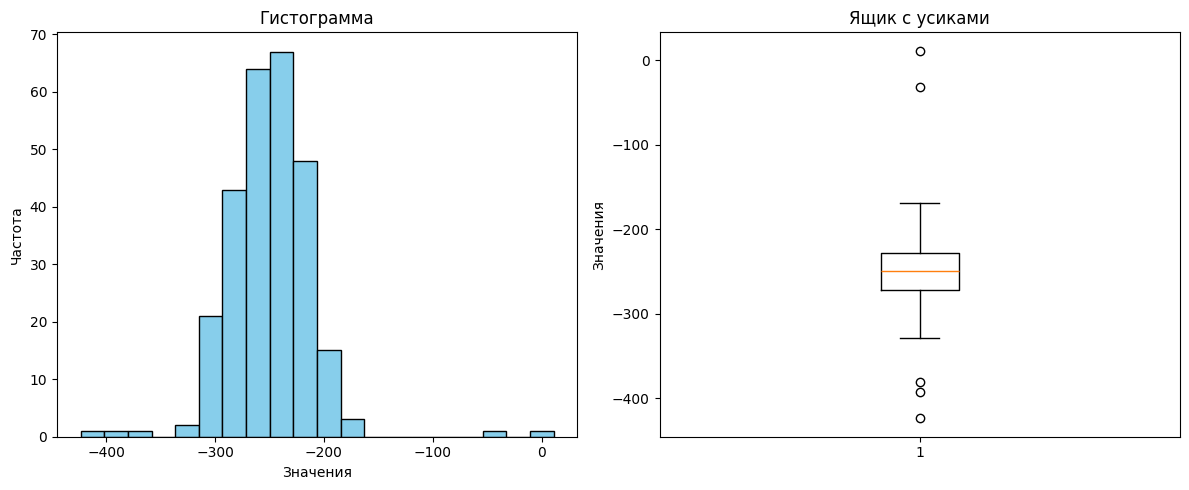

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
 

# 0. Введите данные выборки

data = "12.5; 15.3; NA; 14.8; 13.2; 16.1; NA; 14.0; 15.6; 13.9; 14.5; NA; 15.0; 13.7; 16.4; 14.2; NA; 15.8; 13.5; 14.9"
data = data.split('; ')
clean_data = [float(x) for x in data if x != "NA"]
print(len(data), len(clean_data))
 

# 1. Кол-во пропущенных значений

n_missing = len(data) - len(clean_data)
print("1. Кол-во пропущенных значений:", n_missing)
 

# 2. Очистка от NA и объем выборки

n = len(clean_data)
print("2. Объем очищенной выборки:", n)
 

# 3. Среднее значение

mean = np.mean(clean_data)
print("3. Среднее значение:", mean)
 

# 4. Стандартное отклонение (исправленное)

std = np.std(clean_data, ddof=1)
print("4. Стандартное отклонение:", std)
 

# 5. Несмещенная дисперсия

var = std**2
print("5. Несмещенная дисперсия:", var)
 

# 6. Первая квартиль

q1 = np.percentile(clean_data, 25)
print("6. Q1:", q1)
 

# 7. Третья квартиль

q3 = np.percentile(clean_data, 75)
print("7. Q3:", q3)
 

# 8. Медиана

median = np.median(clean_data)
print("8. Медиана:", median)
 

# 9. Максимум

data_max = np.max(clean_data)
print("9. Максимум:", data_max)
 

# 10. Минимум

data_min = np.min(clean_data)
print("10. Минимум:", data_min)
 

# 11. Размах выборки

range_ = data_max - data_min
print("11. Размах:", range_)

# 11. квартильный размах 
# range_ = q3 - q1
# print("11. Размах выборки:", range_)
 

# 12. Эксцесс

kurt = stats.kurtosis(clean_data, fisher=True, bias=False)
print("12. Эксцесс:", kurt)
 

# 13. Коэффициент асимметрии

skew = stats.skew(clean_data)
print("13. Коэффициент асимметрии:", skew)
 

# 14. Ошибка выборки

stderr = std / np.sqrt(n)
print("14. Ошибка выборки:", stderr)
 

# 15-16. 0.95 CI для E(X)

alpha = 0.05
t_crit = stats.t.ppf(1 - alpha/2, df=n-1)
ci_mean = (mean - t_crit*stderr, mean + t_crit*stderr)
print("15. Левый предел 0.95 CI E(X):", ci_mean[0])
print("16. Правый предел 0.95 CI E(X):", ci_mean[1])
 

# 17-18. 0.95 CI для Var(X)

chi2_lower = stats.chi2.ppf(alpha/2, df=n-1)
chi2_upper = stats.chi2.ppf(1-alpha/2, df=n-1)
ci_var = ((n-1)*var/chi2_upper, (n-1)*var/chi2_lower)
print("17. Левый предел 0.95 CI Var(X):", ci_var[0])
print("18. Правый предел 0.95 CI Var(X):", ci_var[1])
 

# 19-20. Выбросы по правилу 1.5*IQR

iqr = q3 - q1
lower_fence = q1 - 1.5*iqr
upper_fence = q3 + 1.5*iqr
outliers_low = np.sum(clean_data < lower_fence)
outliers_high = np.sum(clean_data > upper_fence)
print("19. Выбросы ниже нормы:", outliers_low)
print("20. Выбросы выше нормы:", outliers_high)
 

# 21. Вариационный ряд, гистограмма и "ящик с усиками"

# Вариационный ряд (отсортированные данные)
variation_series = np.sort(clean_data)
print("Вариационный ряд (первые 10 значений):", variation_series[:10])
 
# Гистограмма и ящик с усиками
plt.figure(figsize=(12,5))
 
plt.subplot(1,2,1)
plt.hist(clean_data, bins=20, color='skyblue', edgecolor='black')
plt.title("Гистограмма")
plt.xlabel("Значения")
plt.ylabel("Частота")
 
plt.subplot(1,2,2)
plt.boxplot(clean_data, vert=True)
plt.title("Ящик с усиками")
plt.ylabel("Значения")
 
plt.tight_layout()
plt.show()